# Bài tập colab số 01. sklearn hand-written digits recognition
This example shows how scikit-learn can be used to recognize images of hand-written digits, from 0-9.

In [1]:
 print(__doc__)
 
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause
 
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pandas as pd
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


## Digits dataset
The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

Note: if we were working from image files (e.g., ‘png’ files), we would load them using matplotlib.pyplot.imread.

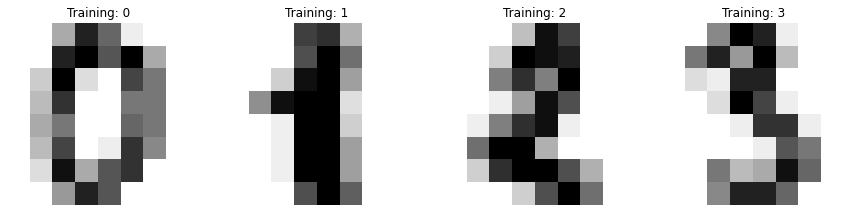

In [2]:
 digits = datasets.load_digits()
 
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [3]:
digits.data


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

## Classification
To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape **(8, 8)** into shape **(64,)**. Subsequently, the entire dataset will be of shape **(n_samples, n_features)**, where **n_samples** is the number of images and **n_features** is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

In [4]:
 # flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
 
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)
 
# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False)
 
# Learn the digits on the train subset
clf.fit(X_train, y_train)
 
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted digit value in the title.

In [5]:
 for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [6]:
 print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted a

We can also plot a **confusion matrix** of the true digit values and the predicted digit values.

Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 52  1  0  0  0  0  0  0]
 [ 0  0  0 47  0  2  0  0  4  0]
 [ 0  0  0  0 54  0  0  0  1  2]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  1  0  0  0  0  0  0 51  0]
 [ 0  0  0  1  0  1  0  0  0 53]]


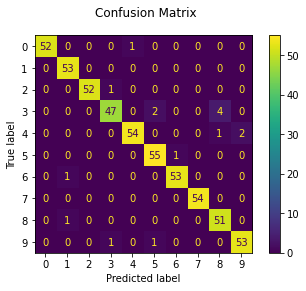

In [7]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
 
plt.show()

**Total running time of the script:** ( 0 minutes 0.925 seconds)

In [10]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [11]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [12]:
def image_name(n):
  return f'Image{n}.jpg'

<IPython.core.display.Javascript object>

Saved to Image0.jpg


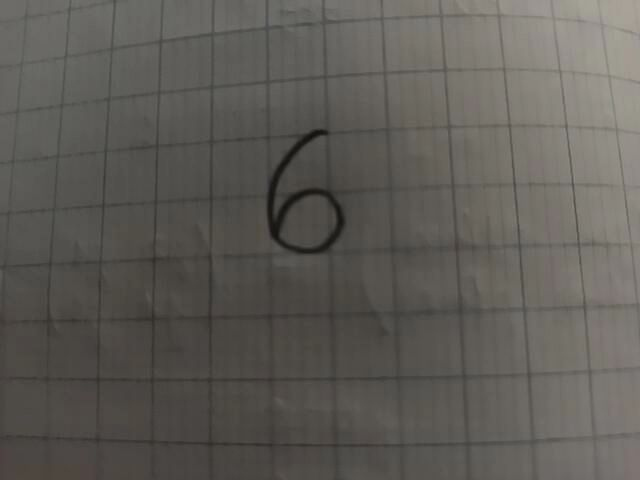

Expected Ptr<cv::UMat> for argument '%s'


In [14]:
from IPython.display import Image
try:
  filename = take_photo(image_name(0))
  print('Saved to {}'.format(filename))
  # Show the image which was just taken.
  display(Image(filename))
  j=image_name(0)
  os.chdir('/content/drive/MyDrive/MyPhoto')
  cv2.imwrite(j,filename)
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# **LABEL**

In [32]:
LaBel=[8,8,8,9,9,9,9,9,8,8,1,1,1,2,2,2,2,4,4,4,4,3,3,3,3,5,5,5,5,5,5,5,6,6,6,6,6,7,7,7,7,7,8,8,1,8,8,8,1,1,1,2,2,0,0,0,0,0,0,0,3,3,4,4,6,7,9]

In [33]:
def image_directory(n):
  return f'/content/drive/MyDrive/MyPhoto/image{n}.jpg'

Test  0 Image  0 Desired result:  8


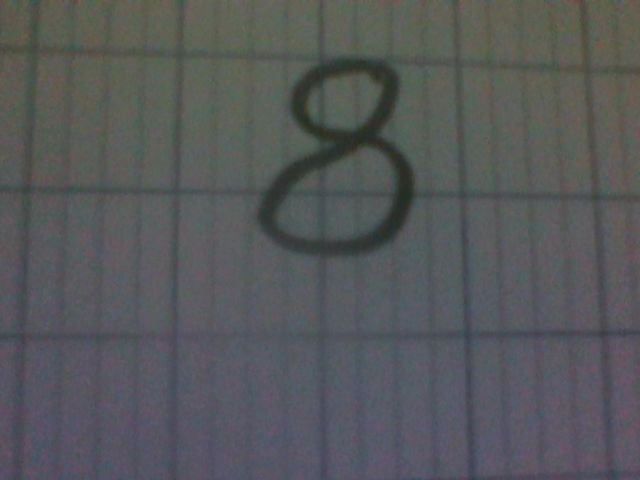

Test  1 Image  1 Desired result:  8


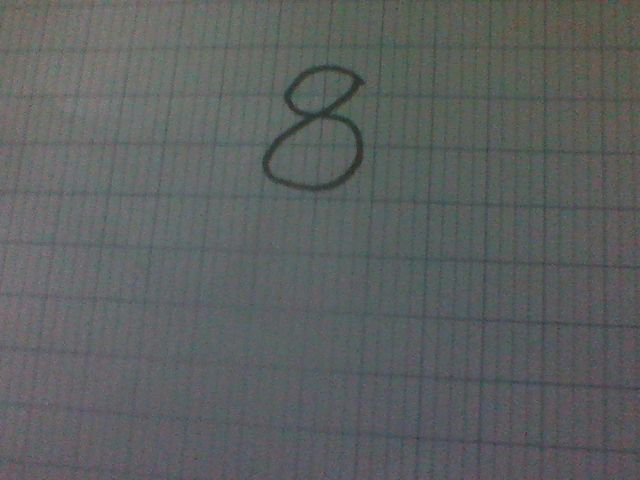

Test  2 Image  2 Desired result:  8


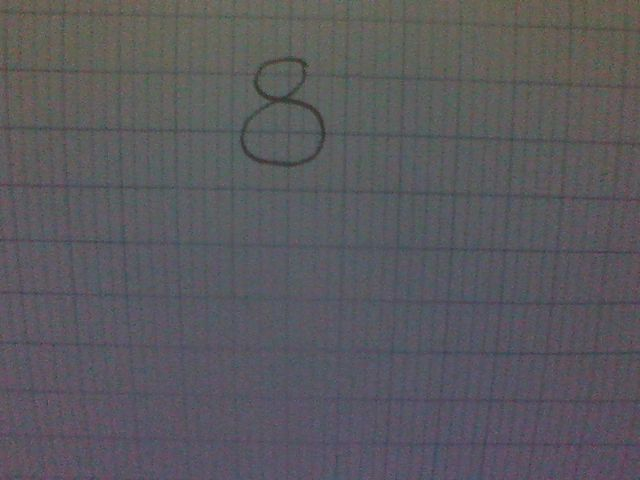

Test  3 Image  3 Desired result:  9


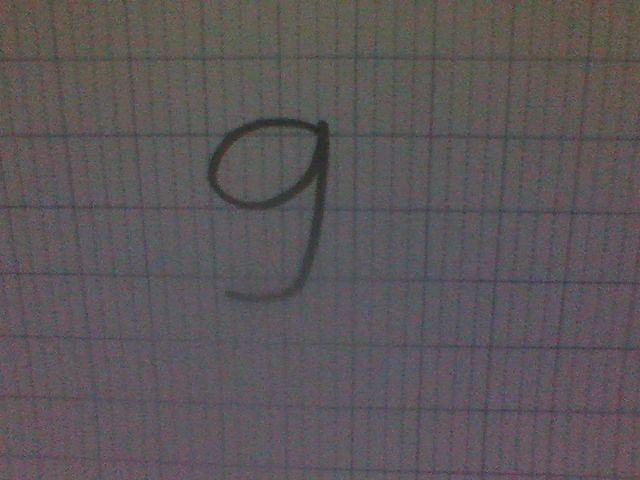

Test  4 Image  4 Desired result:  9


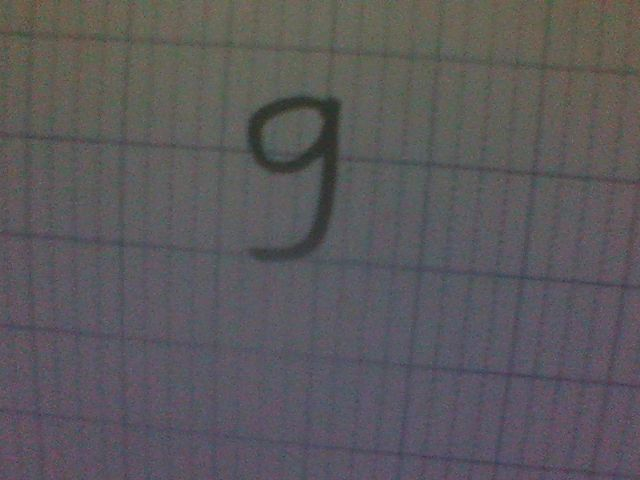

Test  5 Image  5 Desired result:  9


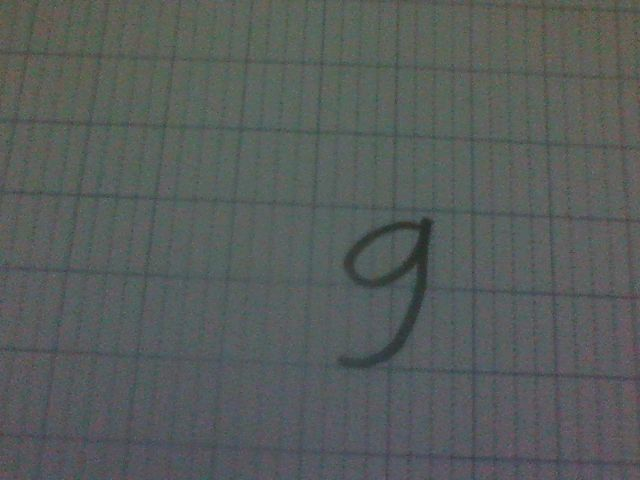

Test  6 Image  6 Desired result:  9


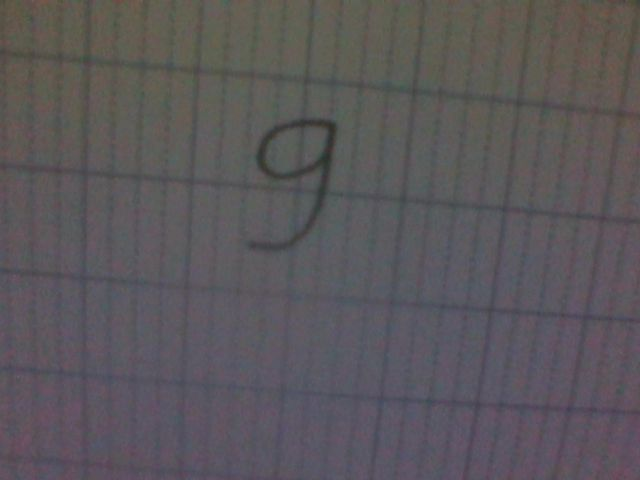

Test  7 Image  7 Desired result:  9


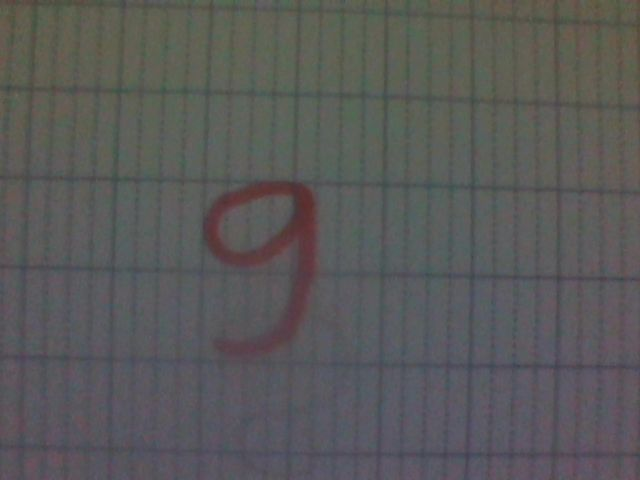

Test  8 Image  8 Desired result:  8


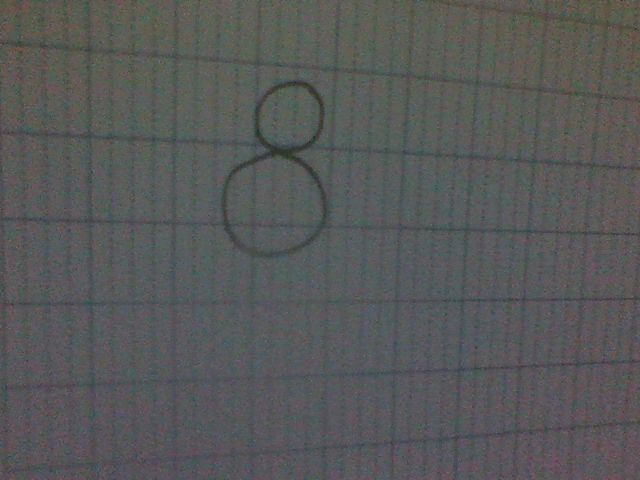

Test  9 Image  9 Desired result:  8


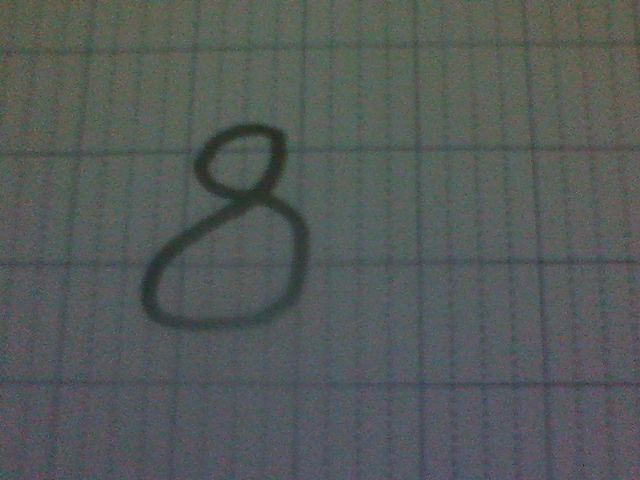

Test  10 Image  10 Desired result:  1


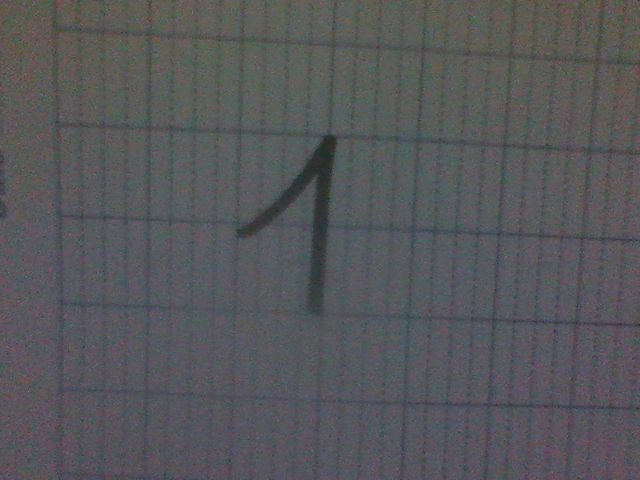

Test  11 Image  11 Desired result:  1


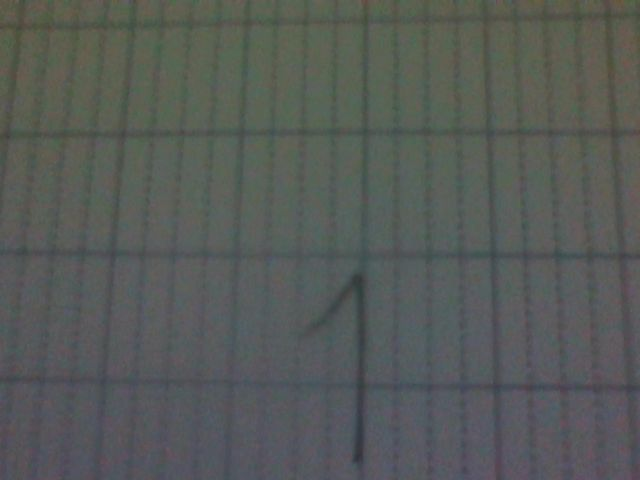

Test  12 Image  12 Desired result:  1


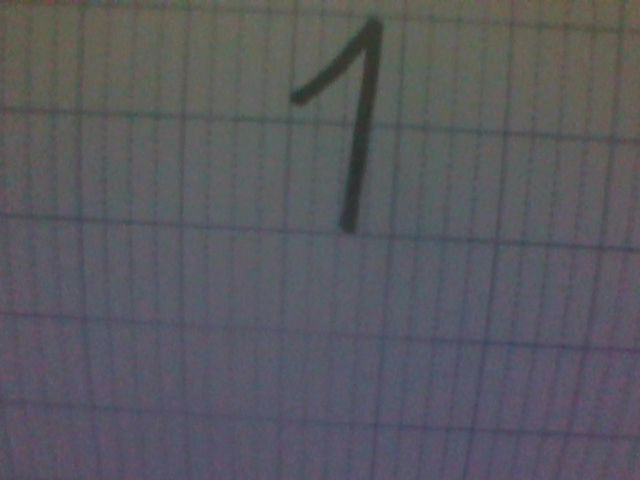

Test  13 Image  13 Desired result:  2


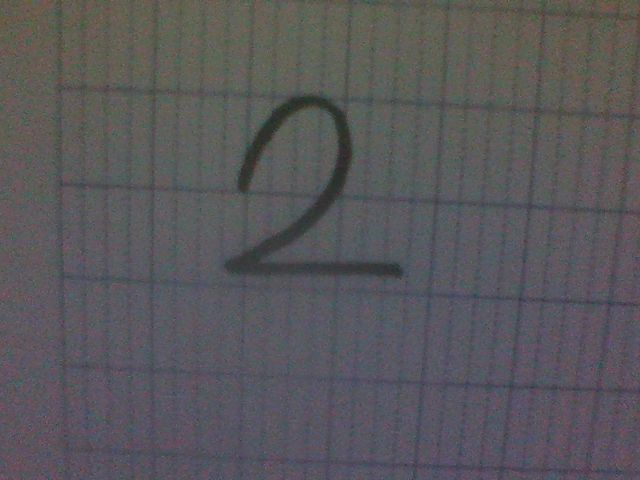

Test  14 Image  14 Desired result:  2


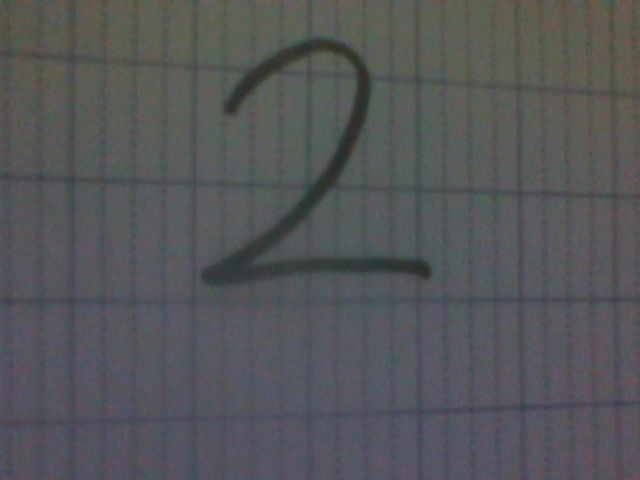

Test  15 Image  15 Desired result:  2


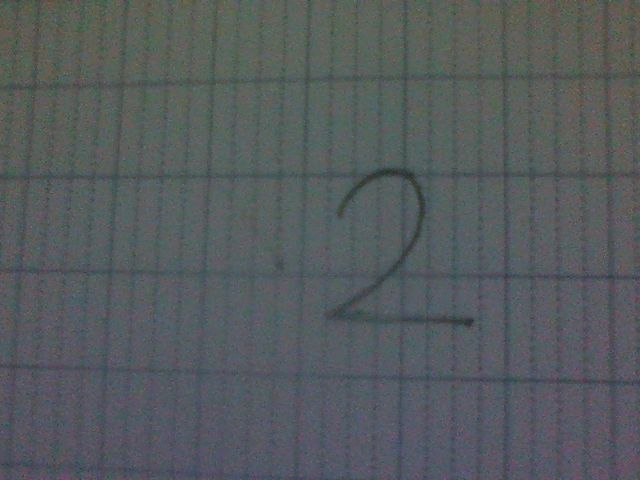

Test  16 Image  16 Desired result:  2


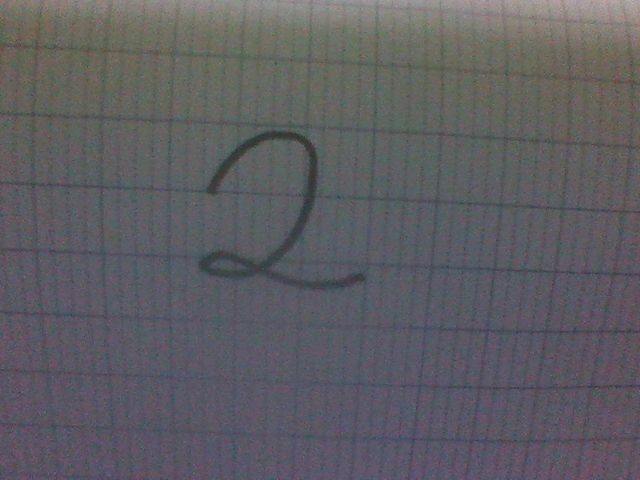

Test  17 Image  17 Desired result:  4


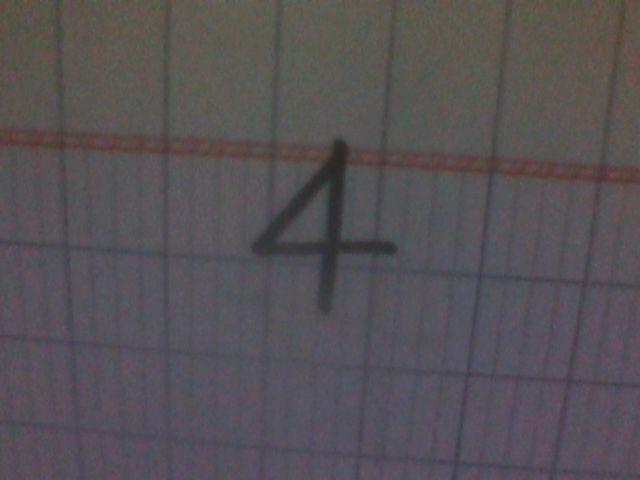

Test  18 Image  18 Desired result:  4


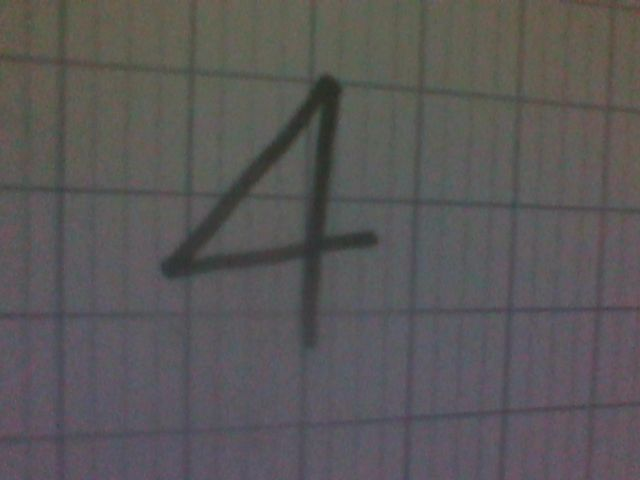

Test  19 Image  19 Desired result:  4


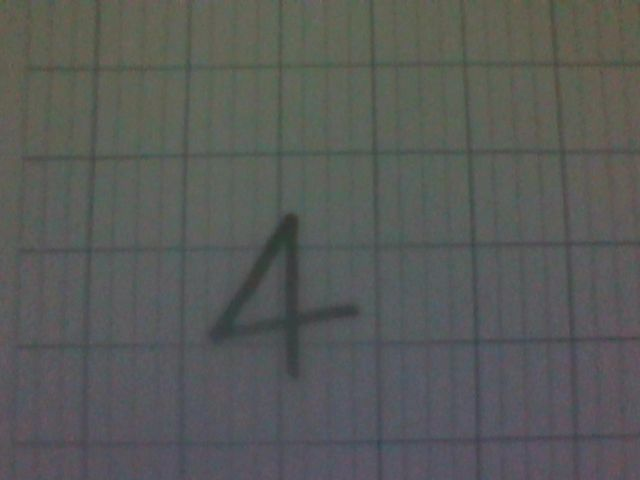

Test  20 Image  20 Desired result:  4


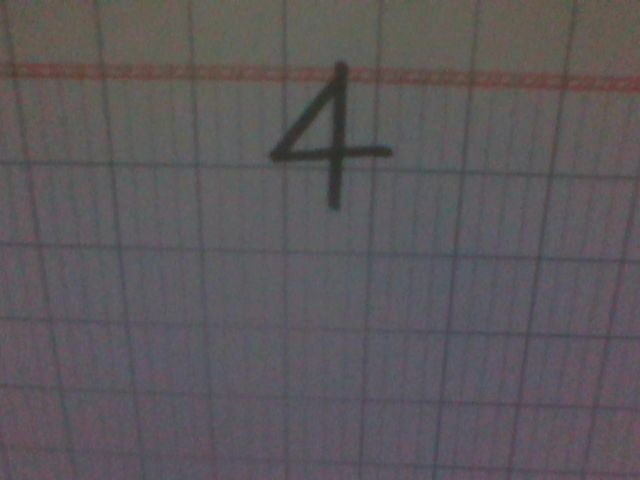

Test  21 Image  21 Desired result:  3


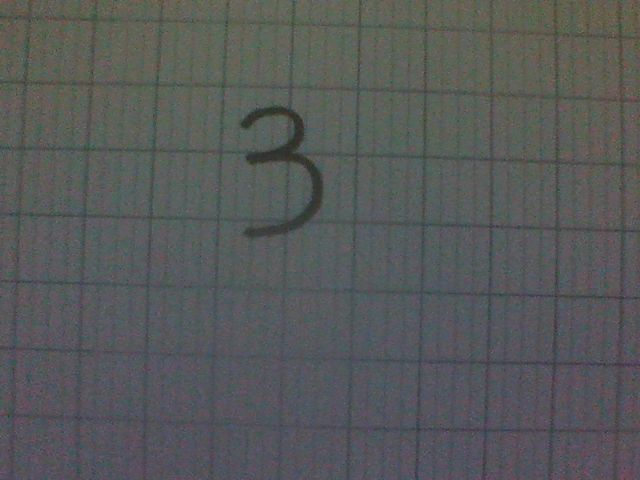

Test  22 Image  22 Desired result:  3


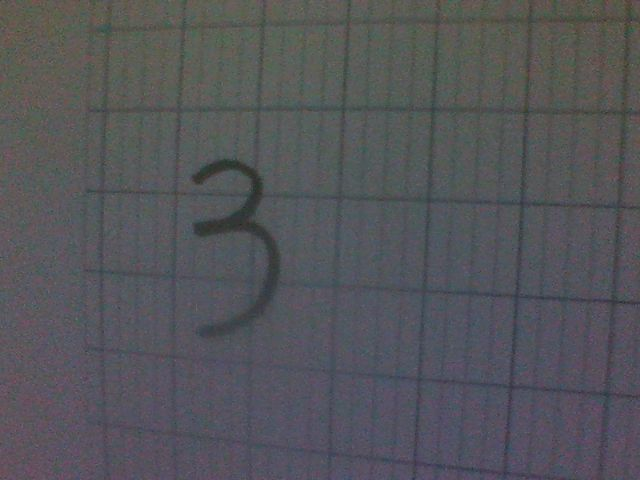

Test  23 Image  23 Desired result:  3


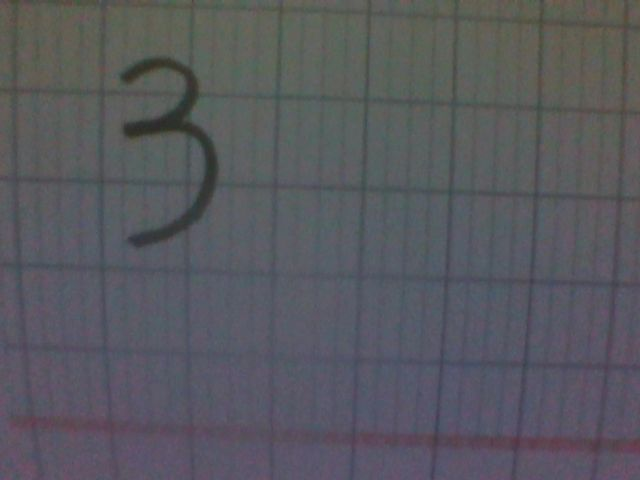

Test  24 Image  24 Desired result:  3


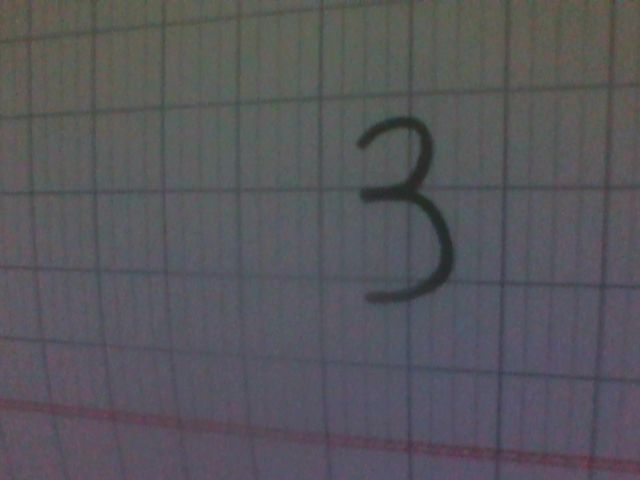

Test  25 Image  25 Desired result:  5


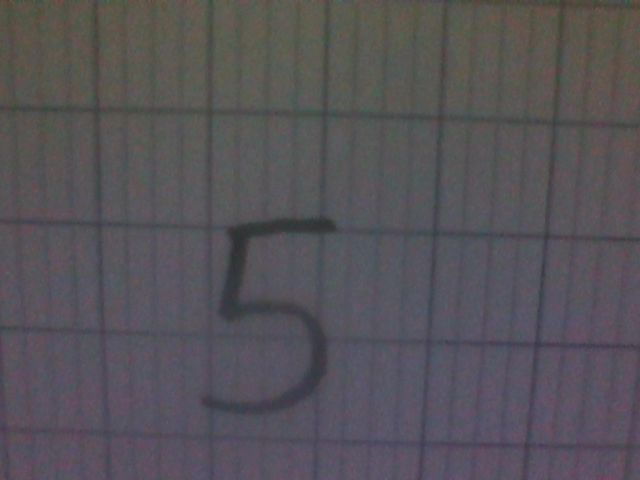

Test  26 Image  26 Desired result:  5


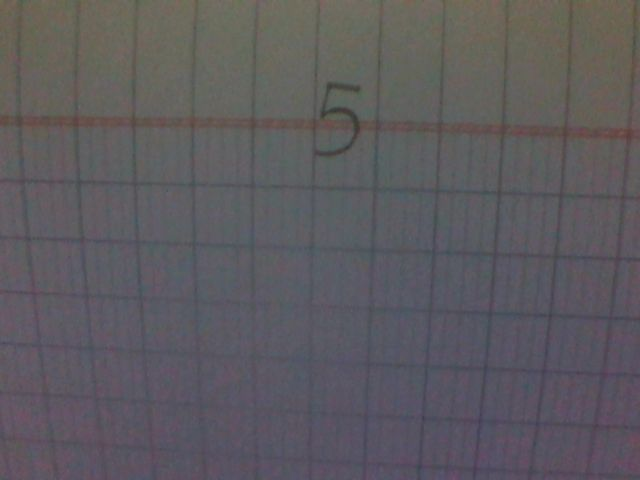

Test  27 Image  27 Desired result:  5


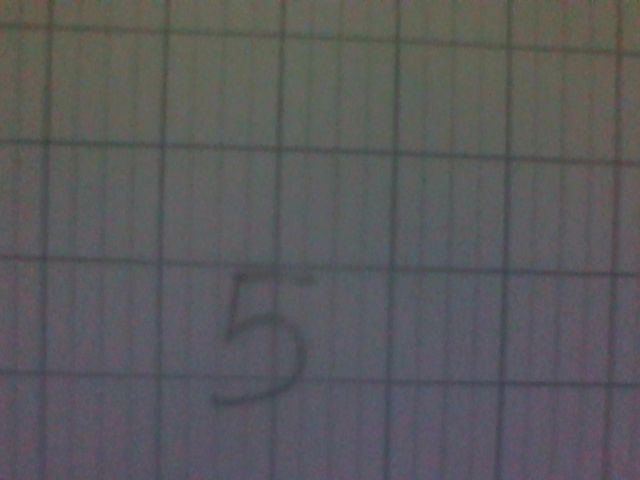

Test  28 Image  28 Desired result:  5


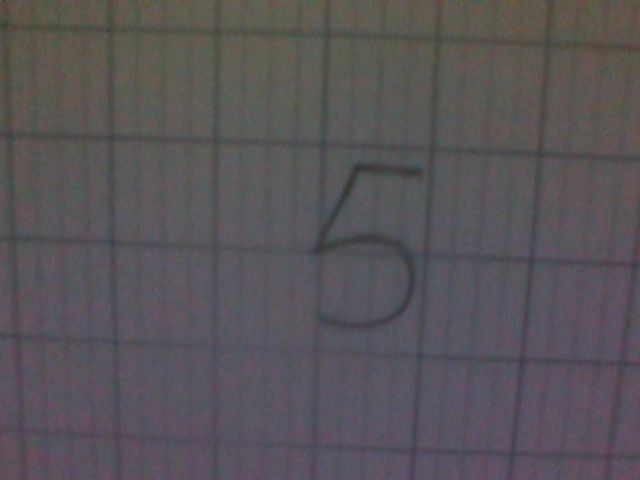

Test  29 Image  29 Desired result:  5


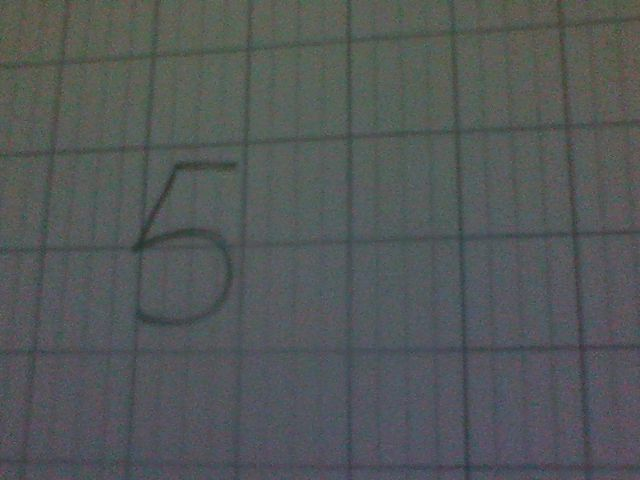

Test  30 Image  30 Desired result:  5


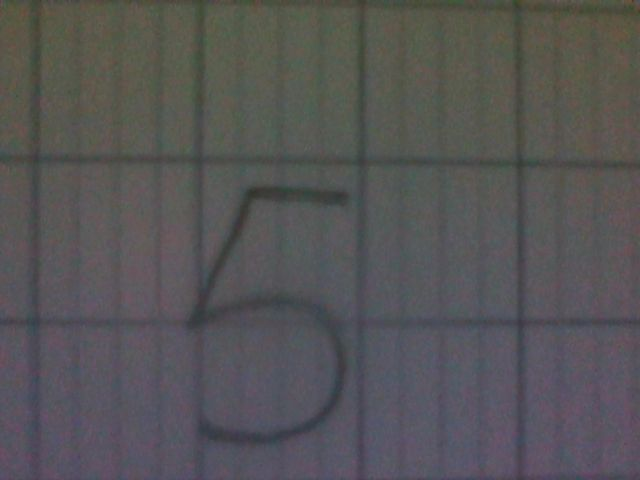

Test  31 Image  31 Desired result:  5


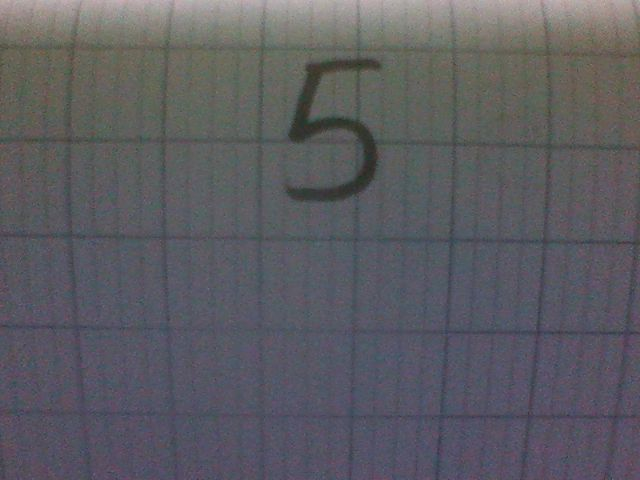

Test  32 Image  32 Desired result:  6


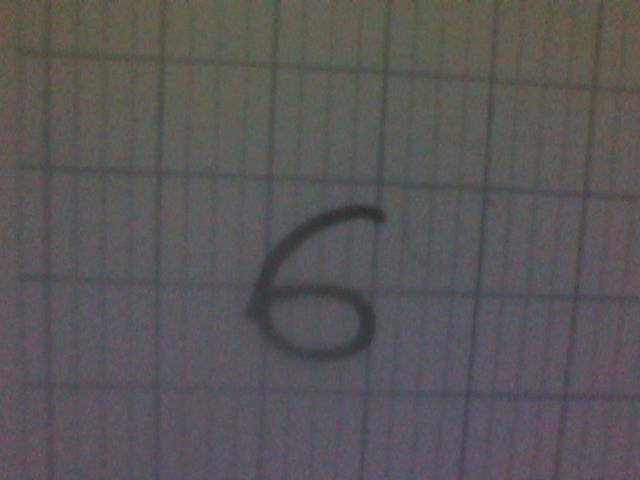

Test  33 Image  33 Desired result:  6


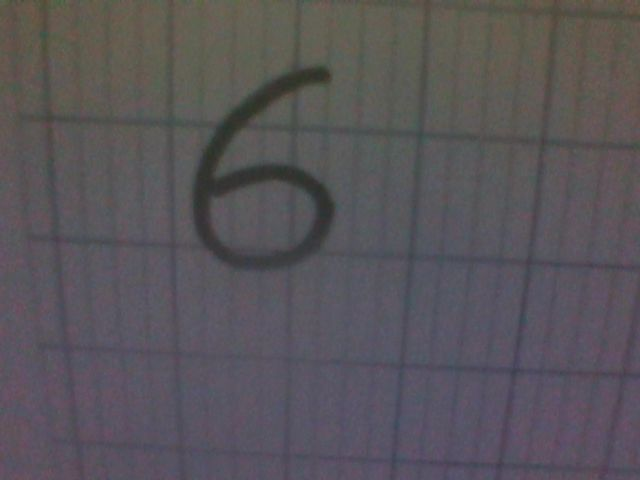

Test  34 Image  34 Desired result:  6


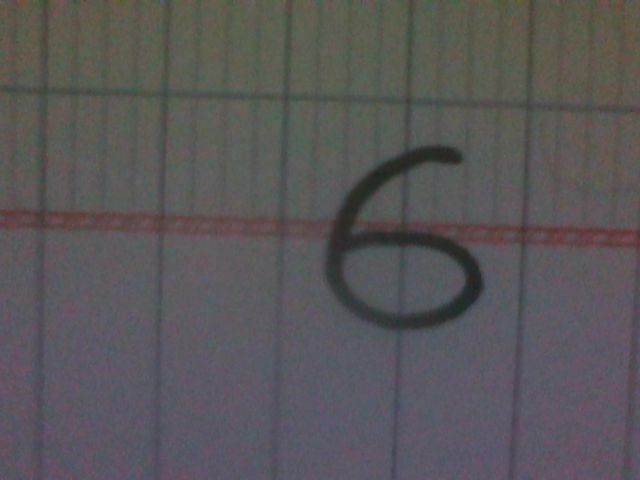

Test  35 Image  35 Desired result:  6


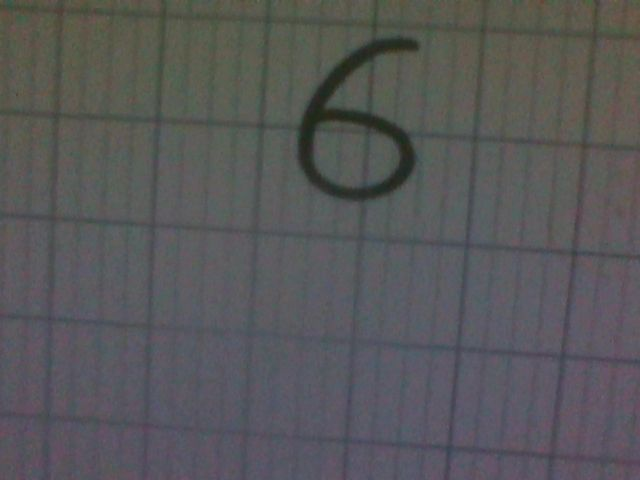

Test  36 Image  36 Desired result:  6


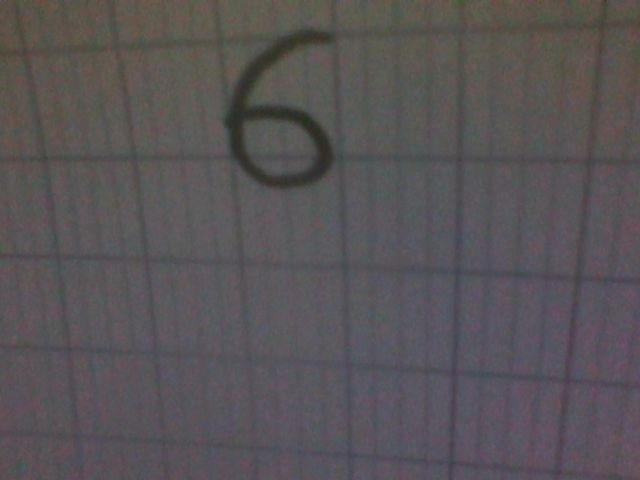

Test  37 Image  37 Desired result:  7


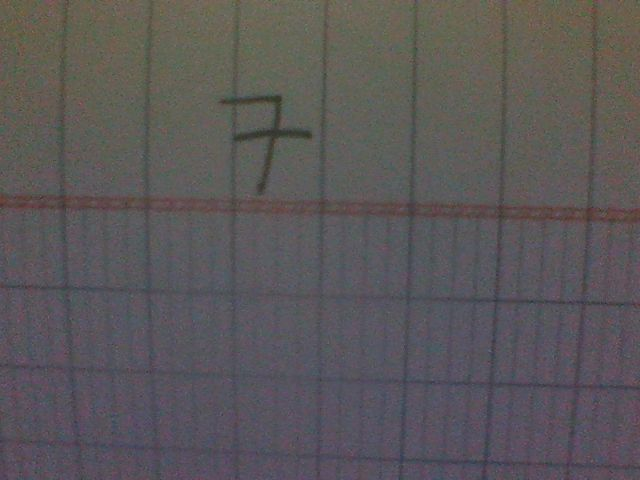

Test  38 Image  38 Desired result:  7


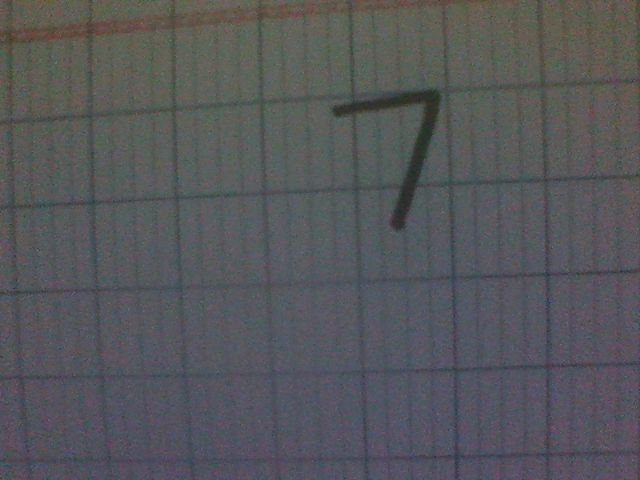

Test  39 Image  39 Desired result:  7


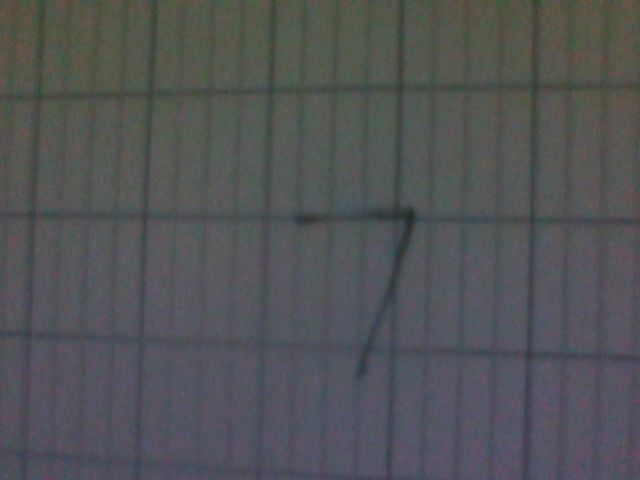

Test  40 Image  40 Desired result:  7


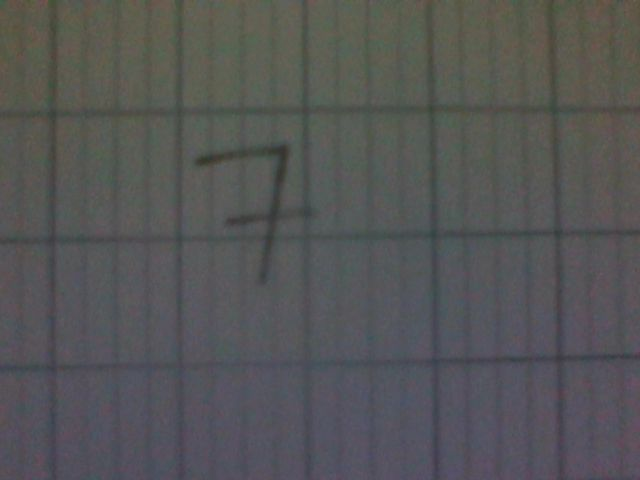

Test  41 Image  41 Desired result:  7


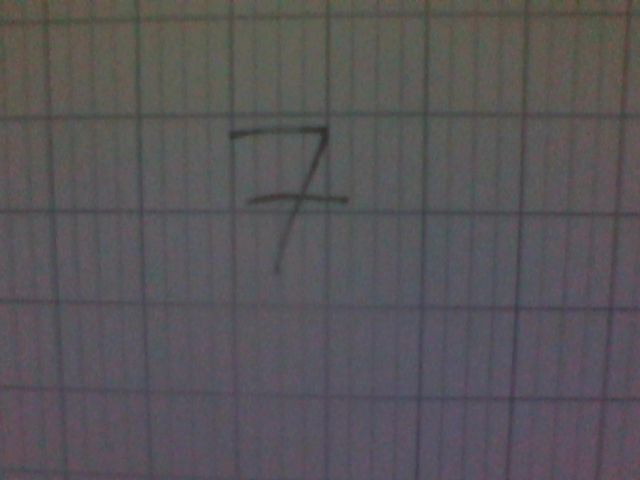

Test  42 Image  42 Desired result:  8


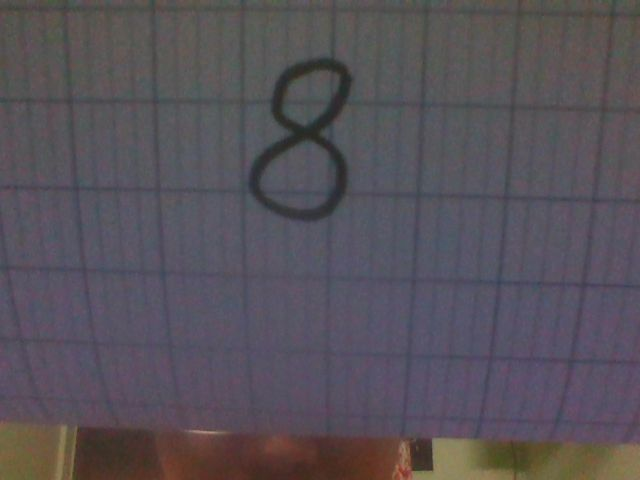

Test  43 Image  43 Desired result:  8


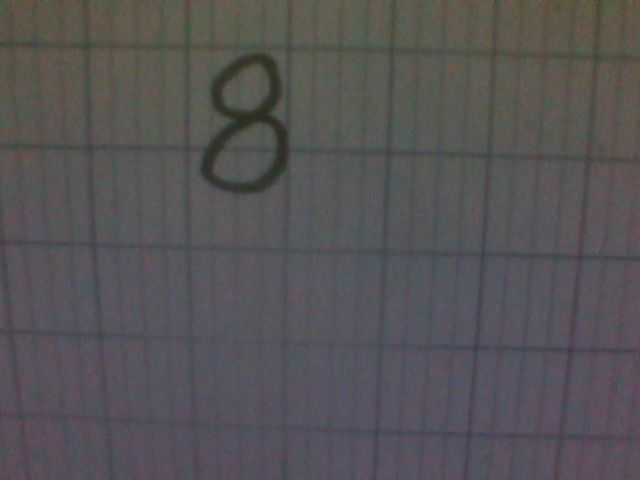

Test  44 Image  44 Desired result:  1


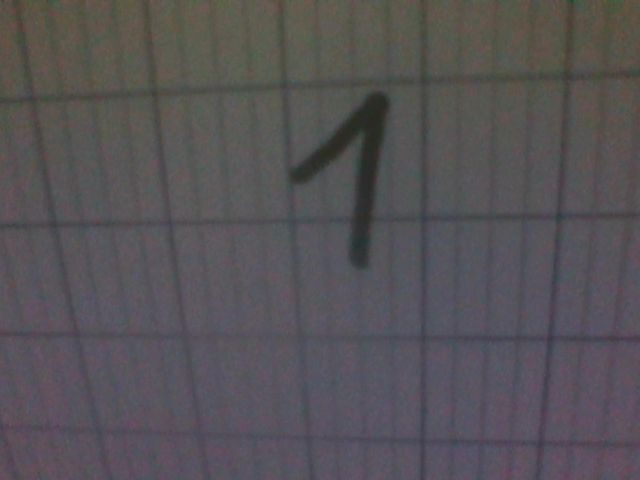

Test  45 Image  45 Desired result:  8


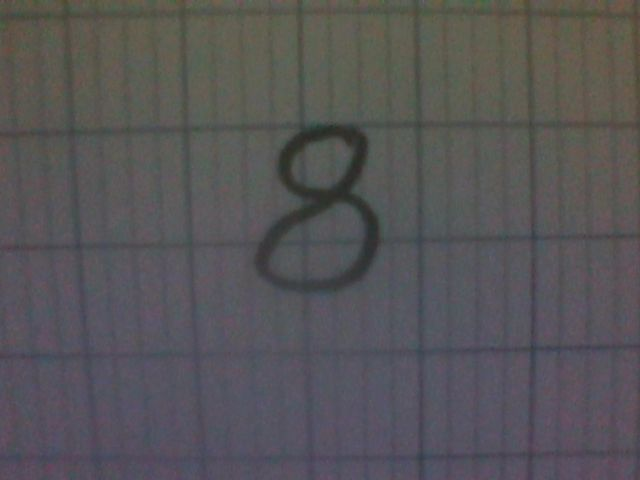

Test  46 Image  46 Desired result:  8


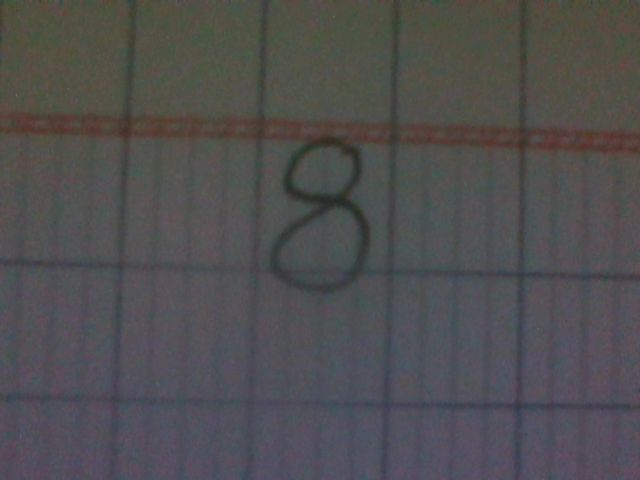

Test  47 Image  47 Desired result:  8


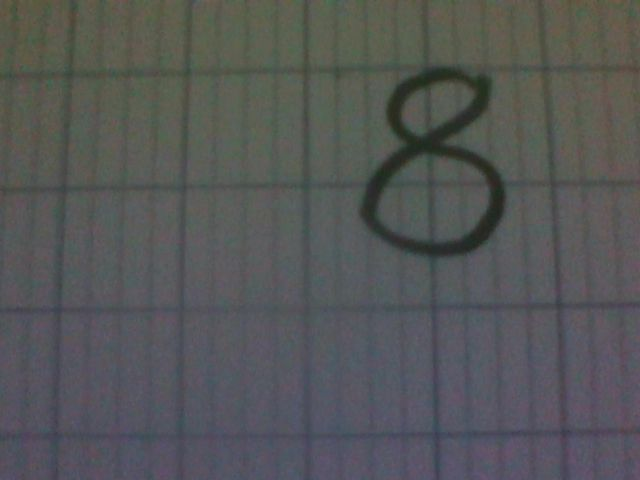

Test  48 Image  48 Desired result:  1


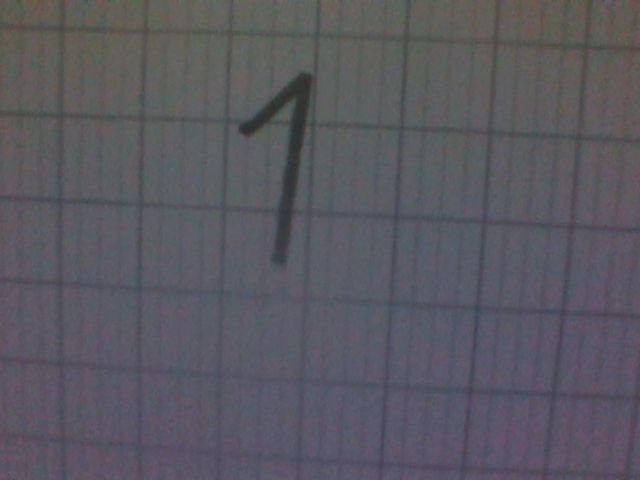

Test  49 Image  49 Desired result:  1


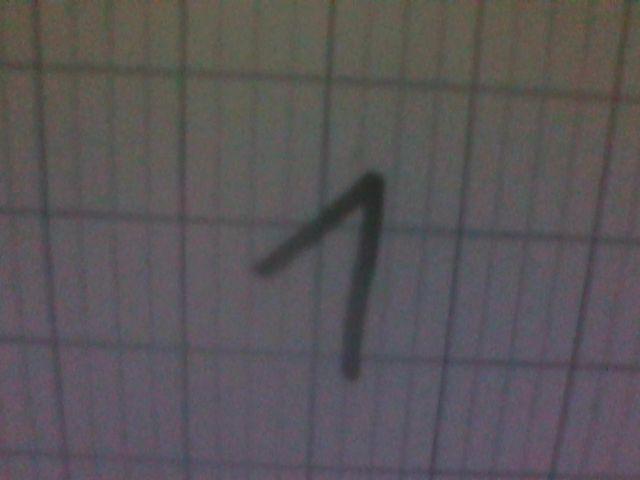

Test  50 Image  50 Desired result:  1


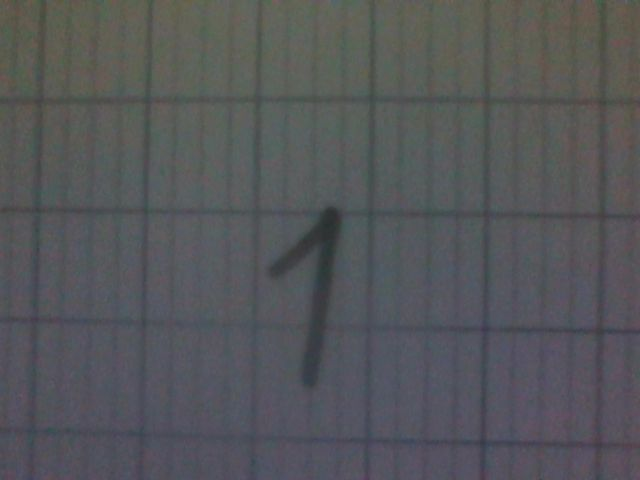

Test  51 Image  51 Desired result:  2


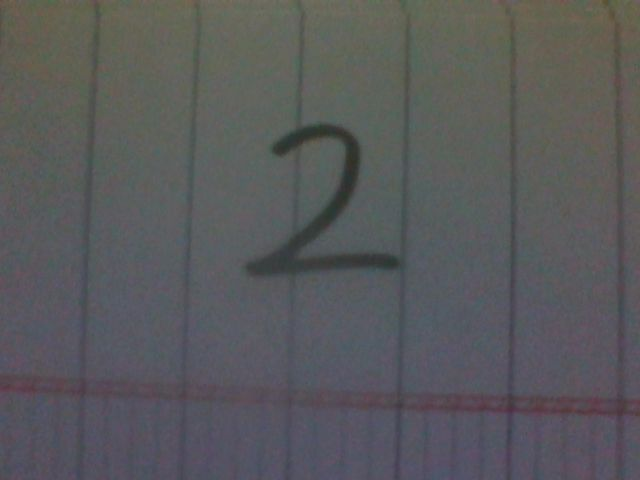

Test  52 Image  52 Desired result:  2


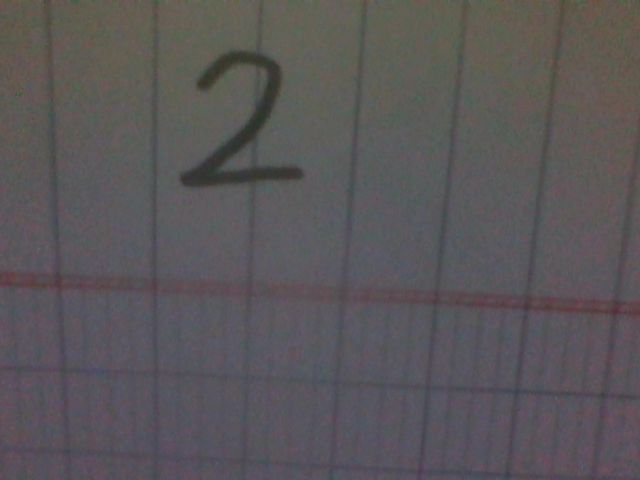

Test  53 Image  53 Desired result:  0


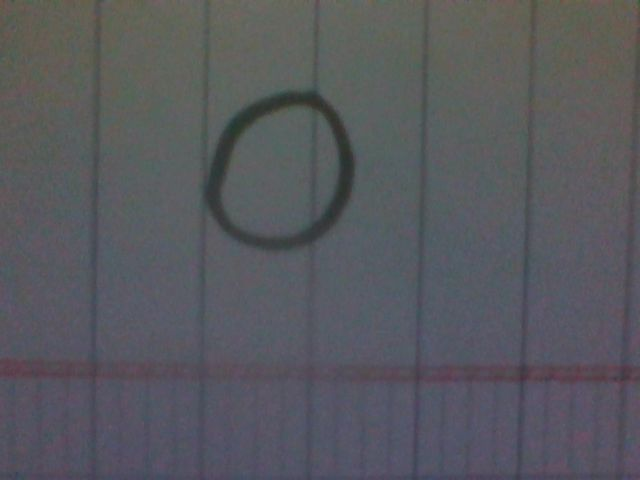

Test  54 Image  54 Desired result:  0


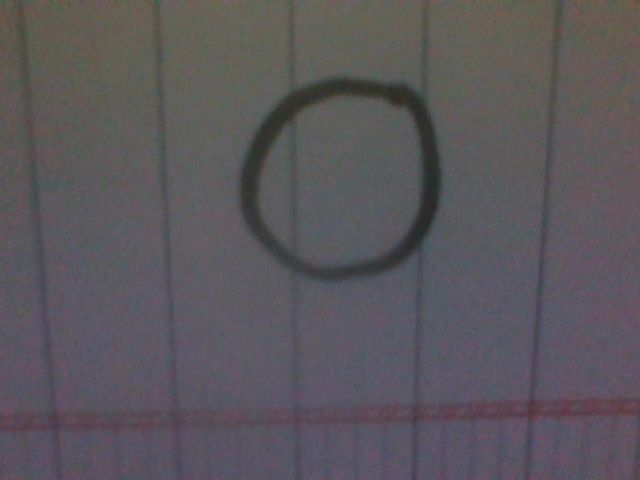

Test  55 Image  55 Desired result:  0


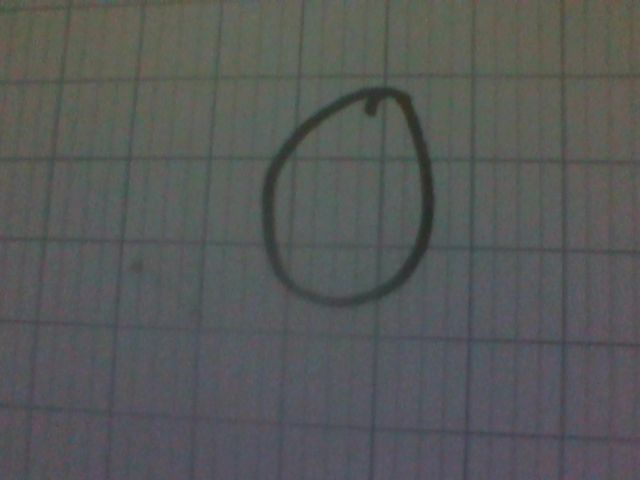

Test  56 Image  56 Desired result:  0


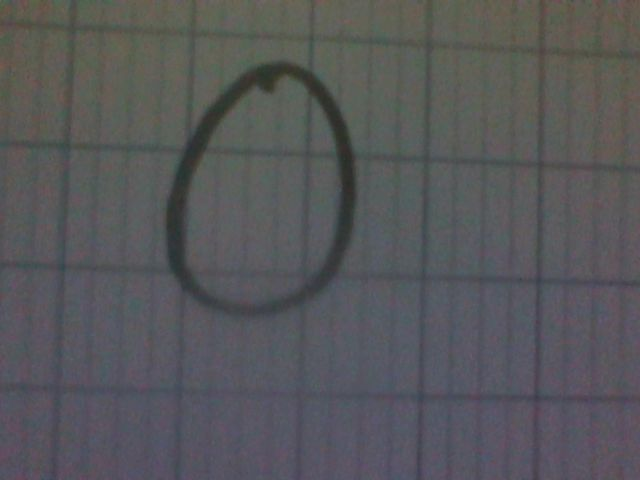

Test  57 Image  57 Desired result:  0


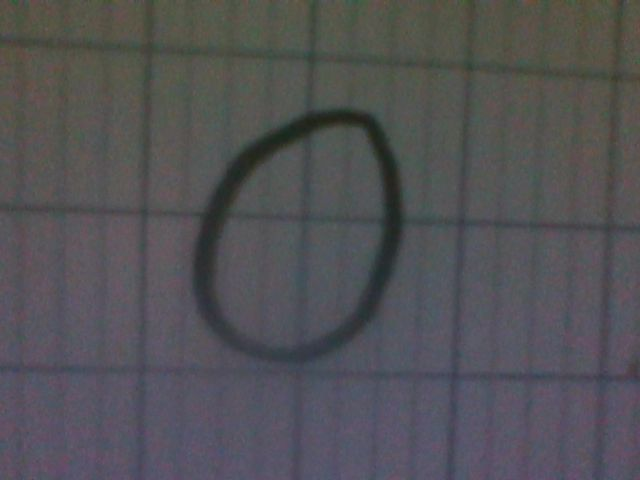

Test  58 Image  58 Desired result:  0


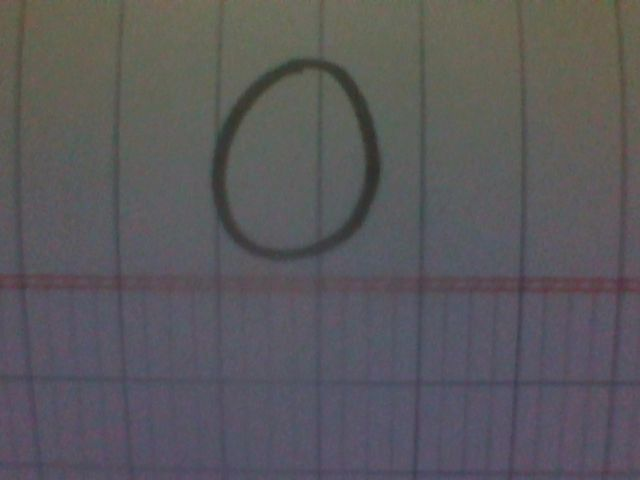

Test  59 Image  59 Desired result:  0


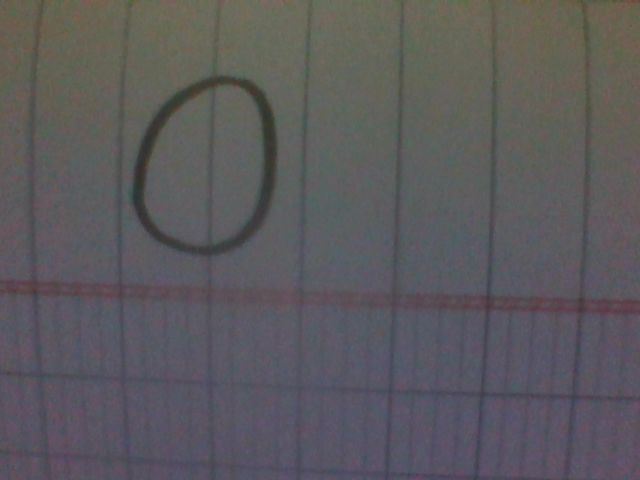

Test  60 Image  60 Desired result:  3


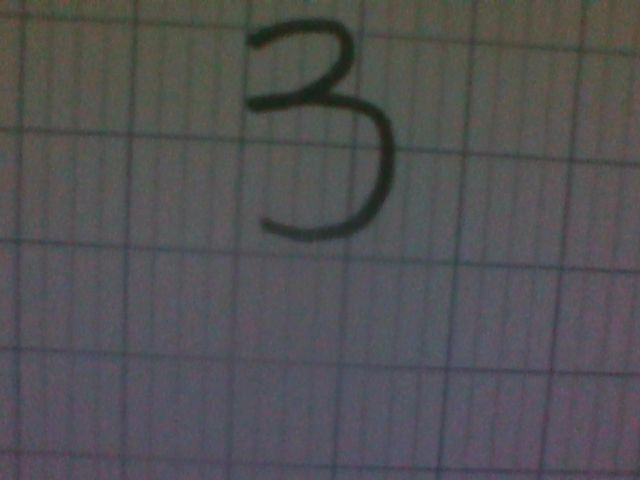

Test  61 Image  61 Desired result:  3


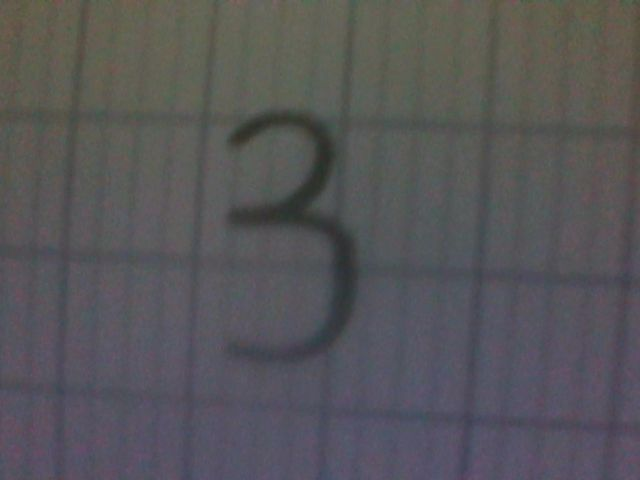

Test  62 Image  62 Desired result:  4


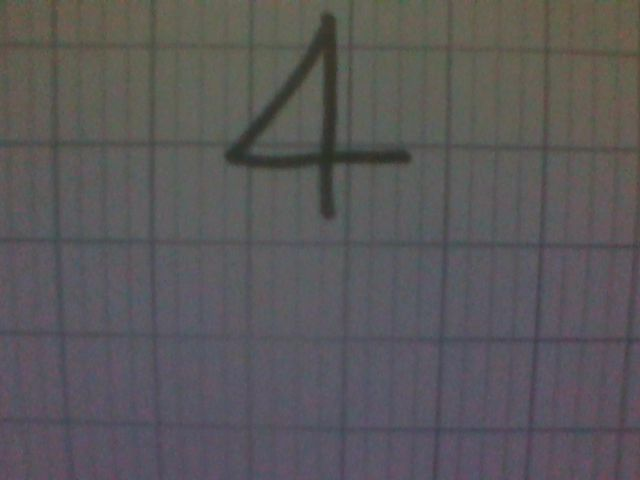

Test  63 Image  63 Desired result:  4


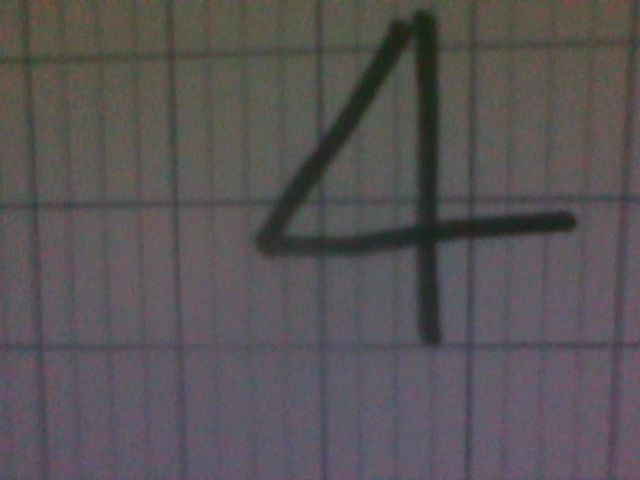

Test  64 Image  64 Desired result:  6


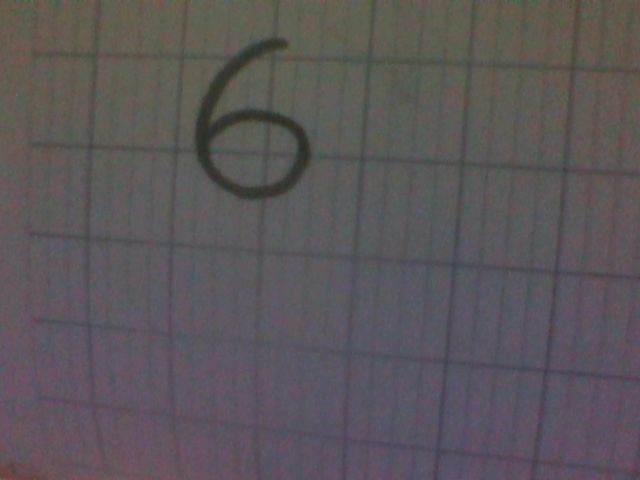

Test  65 Image  65 Desired result:  7


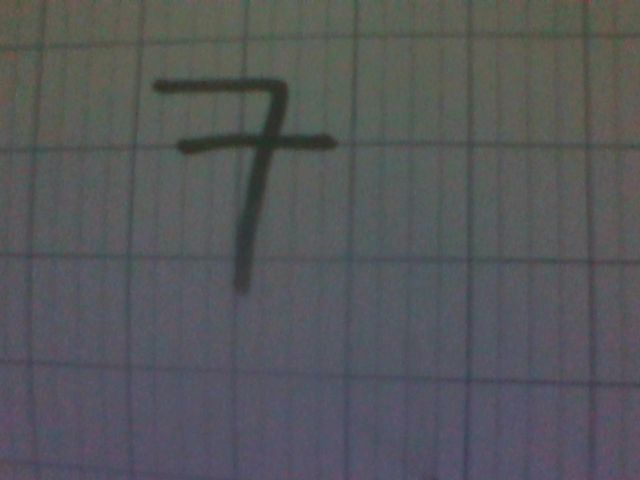

Test  66 Image  66 Desired result:  9


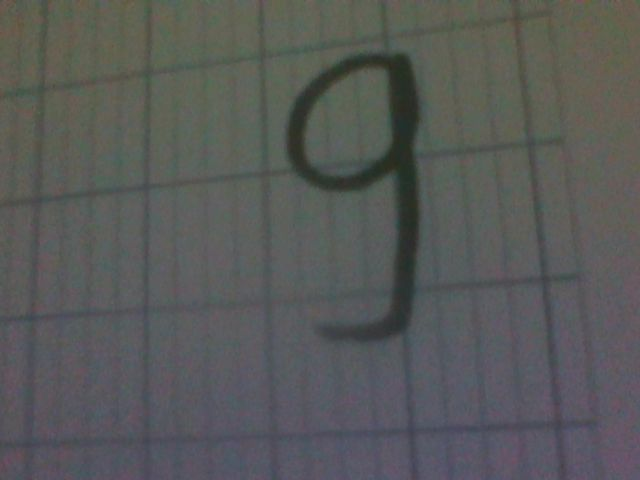

In [41]:
Right_test=0
MyImage = os.listdir('/content/drive/MyDrive/MyPhoto')
for i in range(67):
  print('Test ',str(i), 'Image ',str(i),'Desired result: ',LaBel[i])
  j=image_directory(i)
  display(Image(j))


In [42]:
images = []
for imagex in MyImage:
  image = cv2.imread(imagex, cv2.IMREAD_GRAYSCALE)
  image_8_8 = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA)
  image_8_8 = image_8_8 / np.max(image_8_8)
  image_predict = image_8_8.reshape(1, 64)


  images.append(image_predict)

In [43]:
images = np.array([im.flatten() for im in images])

In [44]:
rslt=clf.predict(images)

In [45]:
print(rslt)

[9 8 8 8 8 8 8 8 7 8 8 8 8 8 8 7 8 8 7 7 8 7 8 8 8 8 7 8 7 8 8 8 7 8 8 8 8
 9 8 7 8 8 8 8 8 8 8 8 8 7 8 7 8 8 8 8 7 7 8 8 8 8 8 7 8 8 8 9]


Test  0 Image  0 Desired result:  8


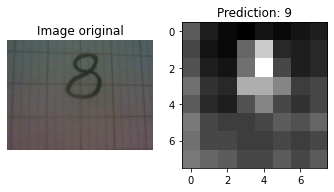

Test  1 Image  1 Desired result:  8


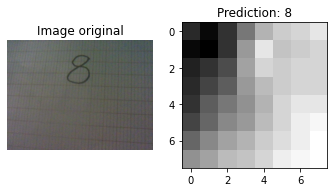

Test  2 Image  2 Desired result:  8


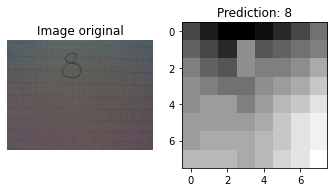

Test  3 Image  3 Desired result:  9


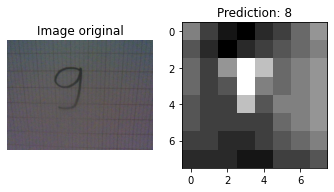

Test  4 Image  4 Desired result:  9


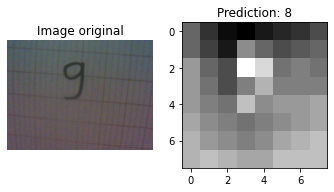

Test  5 Image  5 Desired result:  9


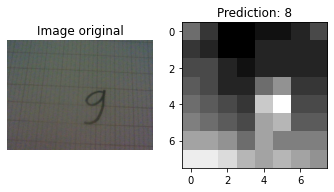

Test  6 Image  6 Desired result:  9


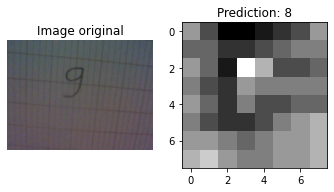

Test  7 Image  7 Desired result:  9


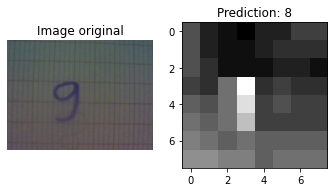

Test  8 Image  8 Desired result:  8


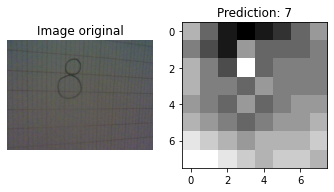

Test  9 Image  9 Desired result:  8


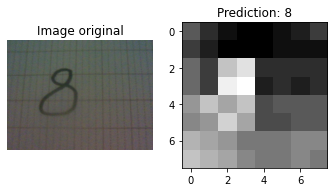

Test  10 Image  10 Desired result:  1


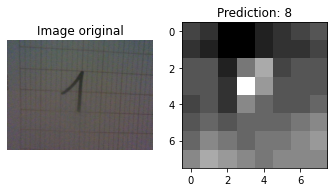

Test  11 Image  11 Desired result:  1


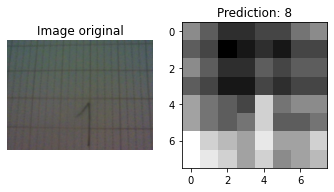

Test  12 Image  12 Desired result:  1


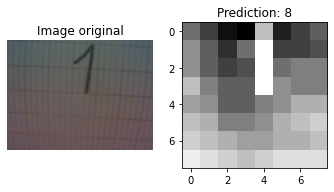

Test  13 Image  13 Desired result:  2


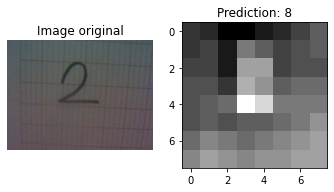

Test  14 Image  14 Desired result:  2


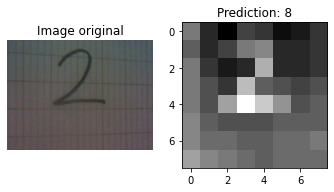

Test  15 Image  15 Desired result:  2


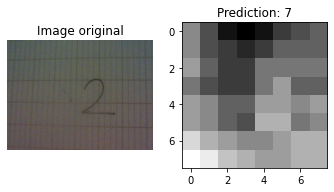

Test  16 Image  16 Desired result:  2


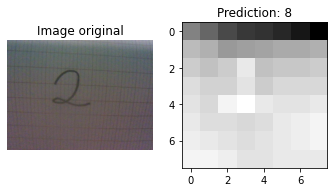

Test  17 Image  17 Desired result:  4


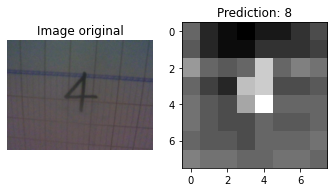

Test  18 Image  18 Desired result:  4


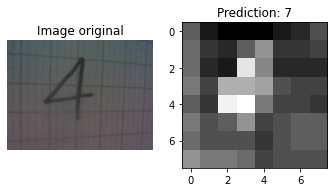

Test  19 Image  19 Desired result:  4


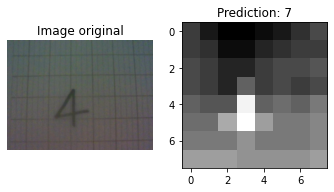

Test  20 Image  20 Desired result:  4


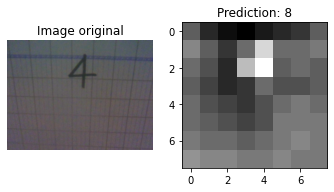

Test  21 Image  21 Desired result:  3


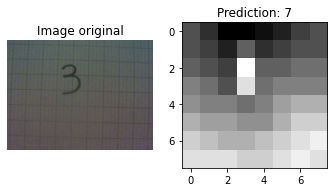

Test  22 Image  22 Desired result:  3


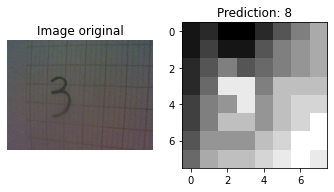

Test  23 Image  23 Desired result:  3


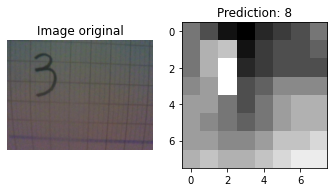

Test  24 Image  24 Desired result:  3


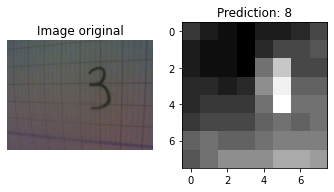

Test  25 Image  25 Desired result:  5


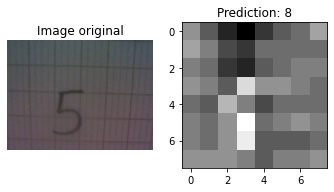

Test  26 Image  26 Desired result:  5


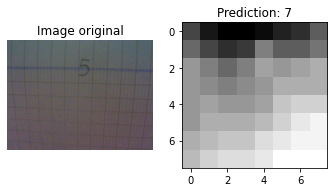

Test  27 Image  27 Desired result:  5


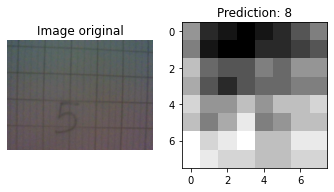

Test  28 Image  28 Desired result:  5


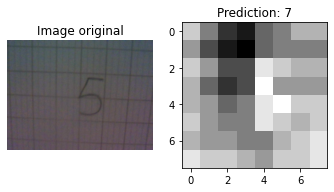

Test  29 Image  29 Desired result:  5


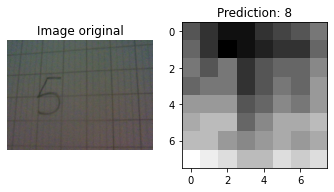

Test  30 Image  30 Desired result:  5


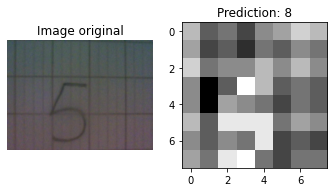

Test  31 Image  31 Desired result:  5


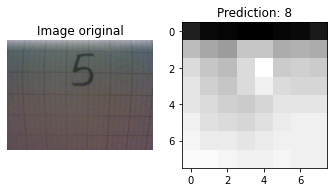

Test  32 Image  32 Desired result:  6


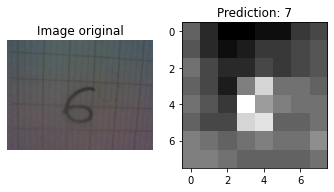

Test  33 Image  33 Desired result:  6


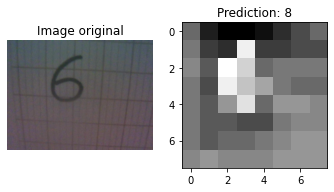

Test  34 Image  34 Desired result:  6


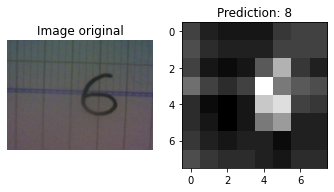

Test  35 Image  35 Desired result:  6


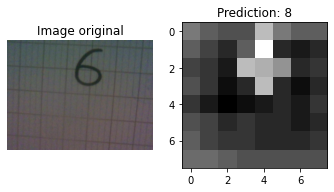

Test  36 Image  36 Desired result:  6


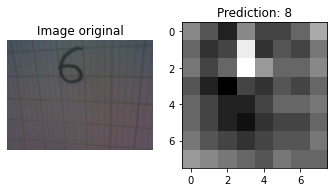

Test  37 Image  37 Desired result:  7


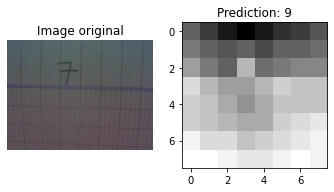

Test  38 Image  38 Desired result:  7


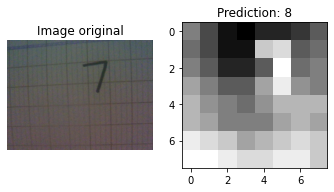

Test  39 Image  39 Desired result:  7


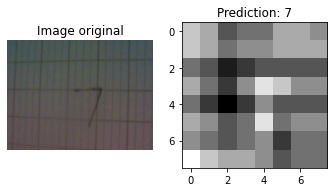

Test  40 Image  40 Desired result:  7


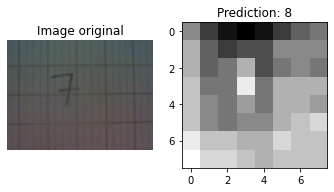

Test  41 Image  41 Desired result:  7


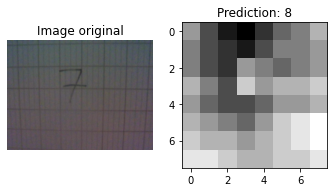

Test  42 Image  42 Desired result:  8


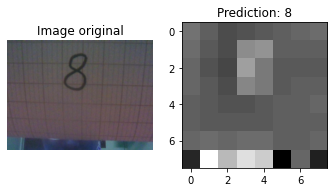

Test  43 Image  43 Desired result:  8


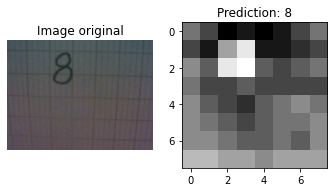

Test  44 Image  44 Desired result:  1


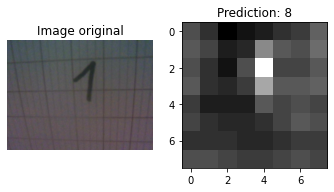

Test  45 Image  45 Desired result:  8


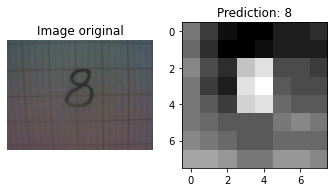

Test  46 Image  46 Desired result:  8


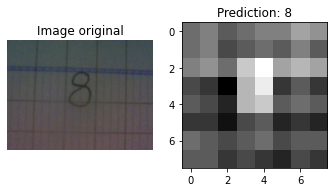

Test  47 Image  47 Desired result:  8


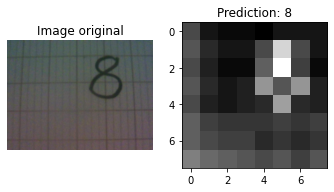

Test  48 Image  48 Desired result:  1


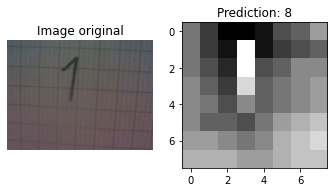

Test  49 Image  49 Desired result:  1


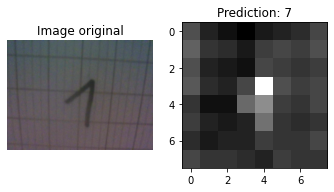

Test  50 Image  50 Desired result:  1


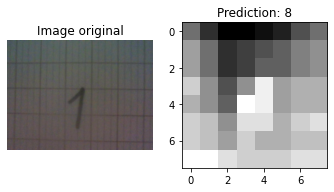

Test  51 Image  51 Desired result:  2


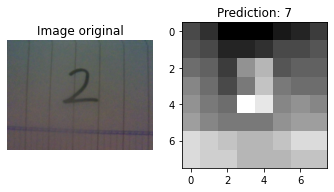

Test  52 Image  52 Desired result:  2


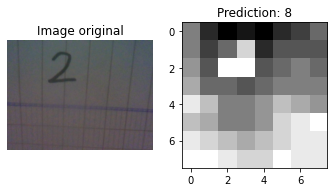

Test  53 Image  53 Desired result:  0


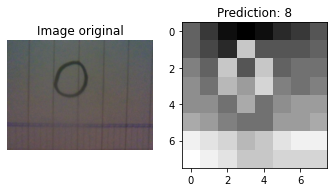

Test  54 Image  54 Desired result:  0


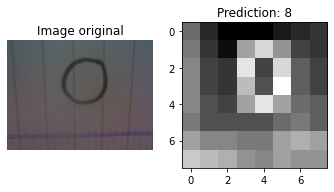

Test  55 Image  55 Desired result:  0


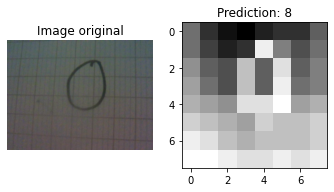

Test  56 Image  56 Desired result:  0


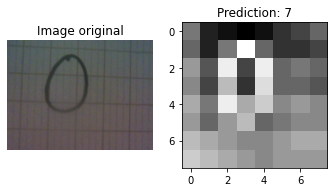

Test  57 Image  57 Desired result:  0


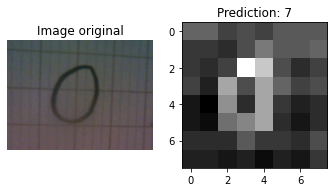

Test  58 Image  58 Desired result:  0


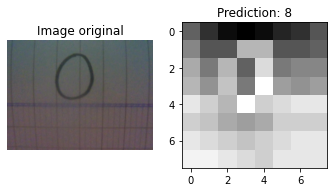

Test  59 Image  59 Desired result:  0


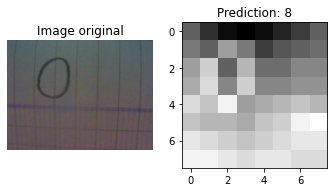

Test  60 Image  60 Desired result:  3


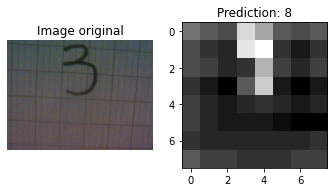

Test  61 Image  61 Desired result:  3


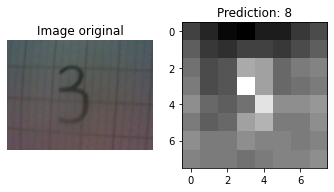

Test  62 Image  62 Desired result:  4


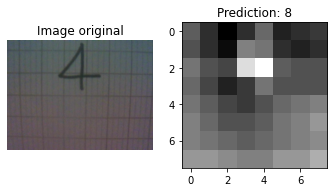

Test  63 Image  63 Desired result:  4


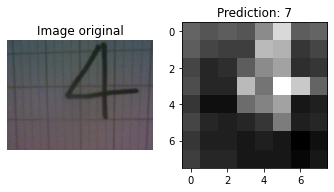

Test  64 Image  64 Desired result:  6


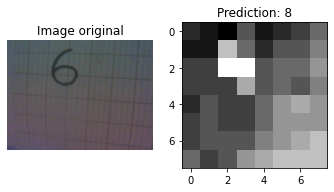

Test  65 Image  65 Desired result:  7


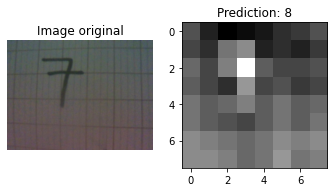

Test  66 Image  66 Desired result:  9


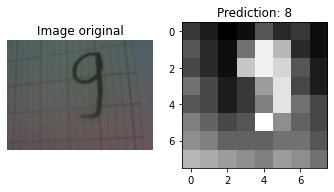

In [46]:
for i in range(67):
  print('Test ',str(i), 'Image ',str(i),'Desired result: ',LaBel[i])
  j=image_directory(i)
  image_original = cv2.imread(j)
  image = cv2.imread(j, cv2.IMREAD_GRAYSCALE)
  image_8_8 = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA)
  image_8_8 = image_8_8 / np.max(image_8_8)
  image_predict = image_8_8.reshape(1, 64)
  plt.figure(figsize=(12, 12))
  j=plt.subplot(1, 4, 1)
  j.set_axis_off()
  plt.imshow(image_original, cmap=plt.cm.binary)
  plt.title("Image original")
  k=plt.subplot(1, 4, 2)
  k.set_axis_off
  plt.imshow(image_8_8, cmap=plt.cm.binary)
  plt.title(f"Prediction: {rslt[i]}")
  plt.show()

## KẾT LUẬN
Tổng số ảnh: 65

Số ảnh dự đoán đúng: 9

Tỉ lệ: 13.85%

**Trả lời câu hỏi:**

1. Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
>Kết quả chạy thực tế với web cam của laptop và giấy viết tay cho kết quả.**không tốt**
2. Ủa mà nhìn vào đâu để kết luận là tốt hay không?
>Nhìn vào kết quả thu được so với kết quả quả mong muốn (Desired result).
3. Nếu không tốt thì lý do tại sao?
>Do các yêu tốt ngoại cảnh:
  * Chữ viết nghiêng, xấu
  * Độ phân giải ảnh thấp, ảnh bị nhòe
  * Nền ảnh (background) bị nhiễu, chữ không nổi bật trên nền
  * Ánh sáng không đều khiến ảnh bị sọc, bị tối gây nhiễu
  * Khi resize ảnh sẽ bị mất pixel nên gây khó dễ cho việc phân loại
4. Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không? 
>Tóm lại, mô hình dự đoán chính xác trên bộ test có một môi trường tốt, với những điều kiện nhất định, đây là điều khó tìm thấy trong thực tế, vì vậy việc áp dụng mô hình này vào các bài toán phức tạp hơn, mang nặng tính thực tế như nhận dạng biển số nhà là không tốt, kết quả thu được sẽ rất thấp, đạt hiệu quả tệ.


